In [ ]:
My Jupyter Notebook on IBM Watson Studio

In [ ]:
Hassan Sultan Sheikh

In [ ]:
I have applied 3 algorithms on Rain dataset and predicted chances of rain.

In [ ]:
The accuracies are compared for each algorithm in form of barchart.

In [ ]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.target import ClassBalance
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

data = pd.read_csv('Rain_Prediction.csv')

le = LabelEncoder()
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Predict-RainTomorrow
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0,0
1,Albury,9.2,28.0,0.0,5.489715,7.647831,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0,0
2,Albury,14.3,25.0,0.0,5.489715,7.647831,W,50.0,SW,W,...,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0,0
3,Albury,9.7,31.9,0.0,5.489715,7.647831,NNW,80.0,SE,NW,...,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0,0
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1,1


In [ ]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Predict-RainTomorrow'],
      dtype='object')

In [ ]:
#Label Encoder library used to convert catagorical data into numeric
# by encoding every category with a specific number 
loc = le.fit_transform(data['Location'])
data.drop("Location", axis=1)
data["Location"] = loc

wgd = le.fit_transform(data['WindGustDir'])
data.drop('WindGustDir', axis=1)
data['WindGustDir'] = wgd

wd9 = le.fit_transform(data['WindDir9am'])
data.drop('WindDir9am', axis=1)
data['WindDir9am'] = wd9

wd3 = le.fit_transform(data['WindDir3pm'])
data.drop('WindDir3pm', axis=1)
data['WindDir3pm'] = wd3


data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Predict-RainTomorrow
0,2,12.9,25.7,0.0,5.489715,7.647831,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0,0
1,2,9.2,28.0,0.0,5.489715,7.647831,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0,0
2,2,14.3,25.0,0.0,5.489715,7.647831,13,50.0,12,13,...,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0,0
3,2,9.7,31.9,0.0,5.489715,7.647831,6,80.0,9,7,...,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0,0
4,2,15.9,18.6,15.6,5.489715,7.647831,13,61.0,6,6,...,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1,1


In [ ]:
#Spliting data for train/test
y = data['Predict-RainTomorrow']
x = data.drop('Predict-RainTomorrow', axis = 1)

train_x, test_x, train_y, test_y = tts(x, y, random_state=7)

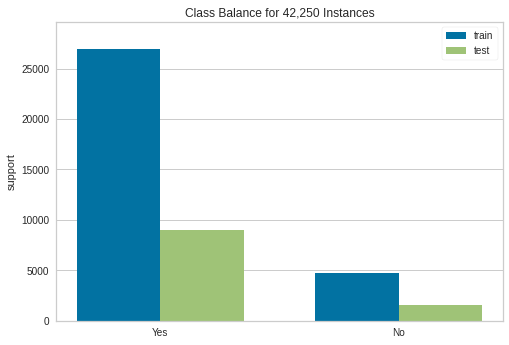

In [ ]:
#Display Splited data
visualizer = ClassBalance(labels=['Yes', 'No'])
visualizer.fit(train_y, test_y)
visualizer.poof()

In [ ]:
#Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier as RF

#Train Model
model = RF(random_state = 7, n_estimators = 100)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=7)

In [ ]:
predicted_RF = model.predict(test_x)
print("Accuracy with Random Forest: ", metrics.accuracy_score(test_y, predicted_RF))

Accuracy with Random Forest:  0.9698949162169838


In [ ]:
print(metrics.confusion_matrix(test_y, predicted_RF))

[[8911   94]

 [ 224 1334]]


In [ ]:
#KNN Implementation
from sklearn.neighbors import KNeighborsClassifier as KNN

# Train the model
model = KNN()
model.fit(train_x,train_y)

#Predict Output
predicted_KNN= model.predict(test_x)
print("Accuracy of KNN: ", metrics.accuracy_score(test_y, predicted_KNN))

Accuracy of KNN:  0.9532329830540566


In [ ]:
print(metrics.confusion_matrix(test_y, predicted_KNN))

[[8853  152]

 [ 342 1216]]


In [ ]:
#Implementing SVC
from sklearn.svm import SVC

#Train the model
model = SVC(random_state=7)
model.fit(train_x, train_y)

#Predict Output
predicted_svc = model.predict(test_x)
print("Accuracy of SVC: ", metrics.accuracy_score(test_y, predicted_svc))

Accuracy of SVC:  0.9342042980213955


In [ ]:
print(metrics.confusion_matrix(test_y, predicted_svc))

[[8955   50]

 [ 645  913]]


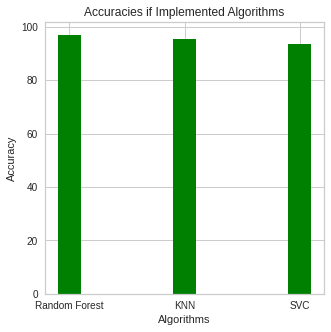

In [ ]:
#Display Bar-Chart to compare accuracies of algorithms
fig = plt.figure(figsize=(5, 5))
plt.bar(['Random Forest', 'KNN', 'SVC'], 
        [metrics.accuracy_score(test_y, predicted_RF)*100, metrics.accuracy_score(test_y, predicted_KNN)*100, metrics.accuracy_score(test_y, predicted_svc)*100], 
        color = 'green', 
        width = 0.2
        )
#x-axis label
plt.xlabel('Algorithms')
#y-axis label
plt.ylabel('Accuracy')
#Title of Figure
plt.title("Accuracies if Implemented Algorithms")
plt.show()